In [143]:
import pandas as pd
import numpy as np
import seaborn as sns

In [162]:
def load_and_process(csv_file_path):

    # Method Chain 1 (Load data and deal with missing data, drop unnecessary columns,and convert all strings to lowercase)

    df1 = (
          pd.read_csv(csv_file_path)
          .dropna(axis=1, how='all')                        #drops the neighbourhood column where all whole column is empty.
          .drop(['last_review','reviews_per_month'],axis=1)
          .applymap(lambda x:x.lower() if type(x) == str else x)
      )
    
    #Using boxplot and scatter plots, the outliers are determined.
    
    #sns.boxplot(x=df1['minimum_nights'])
    #sns.scatterplot(x='price',y='minimum_nights',data = df1)
    #sns.boxplot(x=df1['price'])
    
    df1.loc[df1['minimum_nights']>400, 'minimum_nights'] = df1['minimum_nights'].mean()
    df1.loc[df1['price']>150000,'price'] = df1['price'].mean()
    

    return df1


# EDA
   

**About:**

The data in this dataset is regarding the airbnb listings in Dublin, Ireland. The original dataset contains 15 columns and 19277 rows. These 15 columns (i.e variables) are either categorical or numerical data or string objects. The dataset contains very useful information about the name of the Airbnbs, the name of the hosts who owns the Airbnb, the location of the Airbnb, the price per night, the minimum nights, availability, etc.

### Dataset Cleaning and Loading

In [163]:
df_bnb=load_and_process('../../Data/raw/listings.csv')
df_bnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,3191,malleson garden cottage,3754,brigitte,ward 57,-33.947390,18.476000,entire home/apt,497.0,3.0,54,1,327
1,15007,blaauwberg house,59072,dirk,ward 23,-33.800010,18.460630,entire home/apt,4873.0,2.0,28,6,268
2,15077,top relaxed beach living in style,59342,georg,ward 4,-33.858120,18.490430,private room,1692.0,5.0,5,5,335
3,15180,the melkbaai - beachfront,59663,heinri,ward 83,-34.111240,18.823490,entire home/apt,580.0,2.0,0,1,0
4,15199,self catering apartment,59694,alexa,ward 115,-33.910440,18.412390,entire home/apt,2500.0,14.0,2,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19272,47226603,waterfall 2 bedroom apartment in camps bay,6269301,lisa,ward 54,-33.963088,18.375922,entire home/apt,3074.0,3.0,0,29,358
19273,47226853,tranquil garden cottage with fast internet,3374257,diana,ward 74,-34.045456,18.366974,entire home/apt,671.0,4.0,0,5,358
19274,47230584,quaint mountain retreat above boulders beach,16229677,anthony and juliet,ward 61,-34.206961,18.452896,entire home/apt,559.0,2.0,0,2,82
19275,47231253,heide acc. in serengeti complex,73013529,engela,ward 21,-33.878198,18.644850,entire home/apt,743.0,2.0,0,2,82


### Exploring the dataset

In [164]:
df_bnb.shape

(19277, 13)

In [72]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19277 entries, 0 to 19276
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19277 non-null  float64
 1   name                            19277 non-null  object 
 2   host_id                         19277 non-null  float64
 3   host_name                       19276 non-null  object 
 4   neighbourhood                   19277 non-null  object 
 5   latitude                        19277 non-null  float64
 6   longitude                       19277 non-null  float64
 7   room_type                       19277 non-null  object 
 8   price                           19277 non-null  float64
 9   minimum_nights                  19277 non-null  float64
 10  number_of_reviews               19277 non-null  float64
 11  calculated_host_listings_count  19277 non-null  float64
 12  availability_365                

In [73]:
df_bnb[df_bnb['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9396,25776206.0,cape town city centre apt ★free parking and wifi★,119277747.0,NaN,ward 115,-33.92111,18.41673,entire home/apt,840.0,1.0,57.0,1.0,139.0


In [183]:
df_bnb.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
id,19277.0,2.646915e+07,1.343571e+07,3191.00000,1.567609e+07,2.703828e+07,3.937148e+07,4.723297e+07
host_id,19277.0,1.072429e+08,1.006227e+08,3754.00000,2.603210e+07,6.609031e+07,1.656463e+08,3.813097e+08
latitude,19277.0,-3.396167e+01,1.014487e-01,-34.26440,-3.402682e+01,-3.393433e+01,-3.391034e+01,-3.351615e+01
longitude,19277.0,1.847833e+01,1.281765e-01,18.31941,1.840325e+01,1.843800e+01,1.848843e+01,1.894104e+01
price,19277.0,2.855342e+03,6.633070e+03,122.00000,7.000000e+02,1.300000e+03,2.650000e+03,1.430000e+05
minimum_nights,19277.0,4.133328e+00,1.353928e+01,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,3.650000e+02
number_of_reviews,19277.0,1.540390e+01,3.141794e+01,0.00000,0.000000e+00,3.000000e+00,1.500000e+01,4.630000e+02
calculated_host_listings_count,19277.0,9.669503e+00,2.827685e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,2.250000e+02
availability_365,19277.0,2.247945e+02,1.328832e+02,0.00000,9.000000e+01,2.690000e+02,3.510000e+02,3.650000e+02


In [44]:
df_bnb.describe(include='object').T

,count,unique,top,freq
name,19277,18647,home away from home,28
host_name,19276,4544,charles,239
neighbourhood,19277,95,ward 115,3264
room_type,19277,6,entire home/apt,14343


### Key Observations:
- ward 115 is the most popular location for bnbs.
- the most listed room type is an entire home or an apartment
- the minimum nights of stay varies from 1 day to 365 days( or 1 year)
- if the the availability is less, it means the bnb listing is more popular 

### Potential areas of interest:
- What is relation between price and room type?
- What is the relation between price and number of nights?
- What is the relation between price and neighbourhood?
- What is the relation between price and number of reviews?
- What is the relation between price and availability? 
- What is the relation between the number of nights and the room type?

<AxesSubplot:>

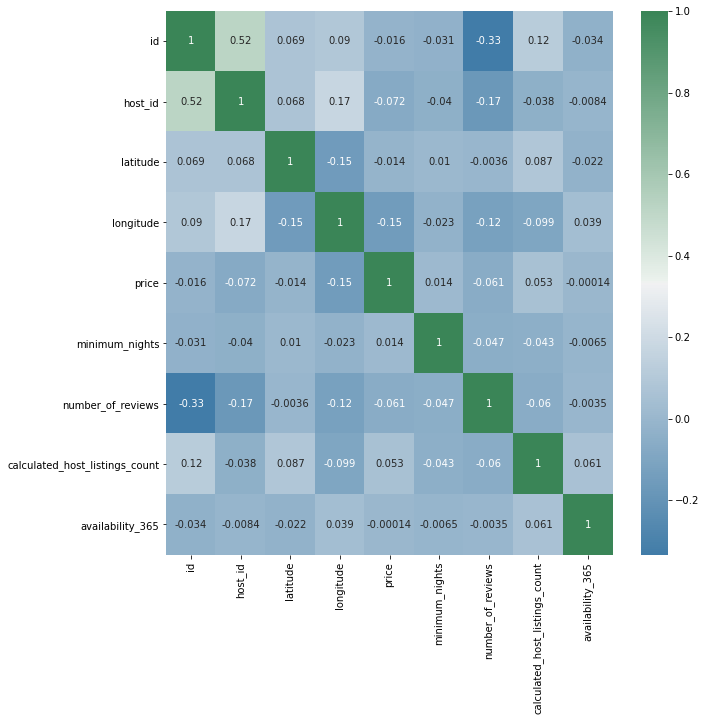

In [205]:
#sns.heatmap(df_bnb.select_dtypes(exclude=['object']))
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
corr = df_bnb.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(600, 500, as_cmap=True), ax=ax)

<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

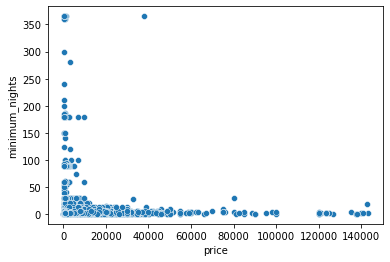

In [227]:
sns.scatterplot(x='price',y='minimum_nights',data=df_bnb)

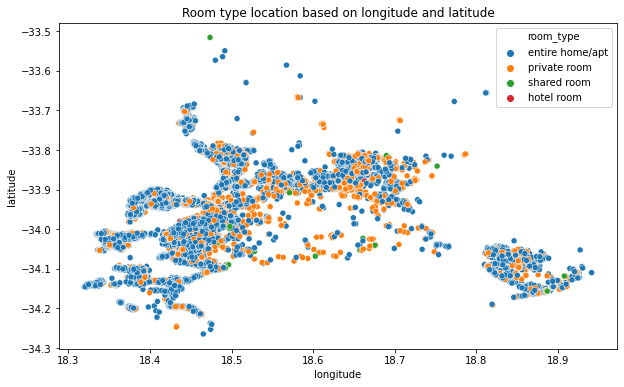

In [226]:

title = 'Room type location based on longitude and latitude'
plt.figure(figsize=(10,6))
sns.scatterplot(df_bnb.longitude,df_bnb.latitude,hue=df_bnb.room_type).set_title(title)
plt.ioff()

In [225]:
import warnings
warnings.filterwarnings(action='ignore')

<AxesSubplot:xlabel='price'>

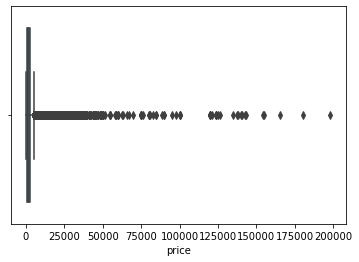

In [150]:
#boxplots will help us determine outliers.

sns.boxplot(x=df_drop['price'])

<AxesSubplot:xlabel='minimum_nights'>

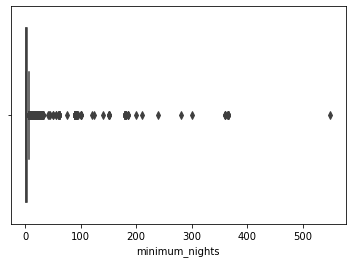

In [151]:
sns.boxplot(x=df_drop['minimum_nights'])

<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

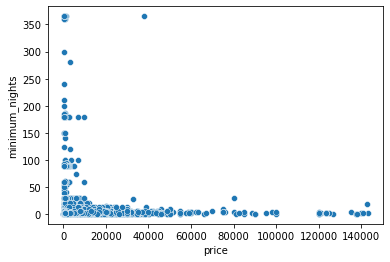

In [159]:
sns.scatterplot(x='price',y='minimum_nights',data = df_drop)